In [2]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('cars.csv')
data.shape

(406, 9)

In [4]:
data.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US


In [5]:
#selecting features according to the problem statement
df = data[["MPG","Cylinders","Weight","Horsepower"]]
df.shape

(406, 4)

In [12]:
df.head(50)

,MPG,Cylinders,Weight,Horsepower
0,18.0,8,3504,130
1,15.0,8,3693,165
2,18.0,8,3436,150
3,16.0,8,3433,150
4,17.0,8,3449,140
5,15.0,8,4341,198
6,14.0,8,4354,220
7,14.0,8,4312,215
8,14.0,8,4425,225
9,15.0,8,3850,190


In [10]:
df.describe()#0- MPG(can be electric, Horsepower doesn't make sense

,MPG,Cylinders,Weight,Horsepower
count,406.000000,406.000000,406.000000,406.000000
mean,23.051232,5.475369,2979.413793,103.529557
std,8.401777,1.712160,847.004328,40.520659
min,0.000000,3.000000,1613.000000,0.000000
25%,17.000000,4.000000,2226.500000,75.000000
50%,22.350000,4.000000,2822.500000,93.500000
75%,29.000000,8.000000,3618.250000,129.000000
max,46.600000,8.000000,5140.000000,230.000000


In [16]:
df = df[(df[['MPG','Horsepower']] != 0).all(axis = 1)]
df.shape

(392, 4)

In [72]:
#seperating independent and dependent variables
x = df.drop(['MPG'], axis=1)
y = df['MPG']
x.shape, y.shape

((392, 3), (392,))

In [18]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
#converting it to df
x = pd.DataFrame(x_scaled, columns = x.columns)

In [19]:
x.head()

,Cylinders,Weight,Horsepower
0,1.483947,0.620540,0.664133
1,1.483947,0.843334,1.574594
2,1.483947,0.540382,1.184397
3,1.483947,0.536845,1.184397
4,1.483947,0.555706,0.924265


In [20]:
# Importing Train test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [38]:
#importing KNN regressor and metric mse

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score

In [43]:
# Creating instance of KNN
reg = KNN(n_neighbors = 5)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating MSE
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('Test MSE    ', k )
# accuracy_score(test_y,test_predict)

Test MSE     14.77264081632653


In [23]:
def Elbow(K):
  #initiating empty list
    test_mse = []
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = mse(tmp,test_y)
        test_mse.append(tmp)
    
    return test_mse

In [28]:
#Defining K range
k = range(1,100) #tried (1,200)

# calling above defined function
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

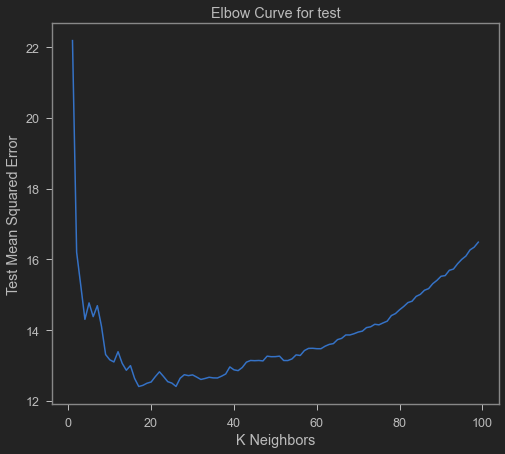

In [29]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

In [60]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[21,22,25.19,20,26,18]}

knn = KNN()
model = GridSearchCV(knn, params, cv=5)
model.fit(train_x,train_y)
model.best_params_

{'n_neighbors': 18}

In [61]:
# Creating instance of KNN
reg = KNN(n_neighbors =18)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('Test MSE    ', k )


Test MSE     12.443099332325522


In [74]:
#according to problem statement
#1st row is test, rest all train
x_train= x.iloc[2:392]
y_train = y.iloc[2:392]

x_test = x.iloc[0:1,[0,1,2]]
y_test = y.iloc[0:1]

y_test

0    18.0
Name: MPG, dtype: float64

In [79]:
# Creating instance of KNN
reg1 = KNN(n_neighbors= 26)

# Fitting the model
reg1.fit(x_train,y_train)

# Predicting over the Train Set and calculating 
pred = reg1.predict(x_test)
print(pred)


[18.31153846]


# Perfect !!!!

Future reference links:
https://towardsdatascience.com/k-nearest-neighbors-and-its-optimization-2e3f6797af04